## required libraries

In [ ]:
import numpy as np
import pandas as pd
import random as rn

pd.set_option("display.max_rows",None)
pd.set_option("display.max_columns",None)

import matplotlib.pyplot as plt
import seaborn as sns

import sklearn

from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import VarianceThreshold

from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import ADASYN
from collections import Counter

import warnings
warnings.filterwarnings("ignore")

# models:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier

# metrics
from sklearn.metrics import log_loss
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score ,auc
from sklearn.metrics import roc_curve , auc


In [ ]:
import numpy as np
import pandas as pd
pd.set_option("display.max_rows",None)
pd.set_option("display.max_columns",None)

import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.feature_selection import VarianceThreshold

from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings("ignore")

from xgboost import XGBClassifier
from sklearn.metrics import log_loss,confusion_matrix,roc_auc_score,roc_curve,auc

## required manual functions

In [ ]:
def dataset_analysis(df):
  """
   this function takes dataframe as input and gives some description and details are generated.
  """
  print("This dataset having {0} rows and {1} columns.".format(df.shape[0],df.shape[1]))
  int_cols=[]
  float_cols = []
  obj_cols=[]
  for i in df.columns[:]:
    if df[i].dtype == "int":
      int_cols.append(i)
    elif df[i].dtype == "float":
        float_cols.append(i)
    else:
        obj_cols.append(i)
    
  print("dataset have {0} integer type & {1} float type & {2} object type".format(len(int_cols),len(float_cols),len(obj_cols)))
  print("-"*50)
  print(df.info())
  print("-"*50)
  #print(df.head(3))
  return df.head(3)
  #print(df.describe())

In [ ]:
def missingdata_pts(df):
  """
     this function takes dataframe as input and check there is any missing /Nan values are existed in that dataframe.
  """
  # check the missing values in the given dataset.
  print("the missing values in the given dataset is {0}.".format(df.isna().sum().sum()))

In [ ]:
# removing the constant features
def constant_features(df):
  """
    Constant Feature: Same value in all the records. 
    it takes dataframe as input and remove the constant features because those kind of features are not useful for classification.
  """
  constant_columns = []
  for i in df.columns[:]:
    if df[i].nunique() == 1:
      constant_columns.append(i)
  print("{0} of constant features in the given dataframe".format(len(constant_columns)))
  return constant_columns

In [ ]:
def quasiconstant_features(df):
  """
  Quasi Constant Feature: One of the values is dominant 99.9%.
  """
  import sklearn
  from sklearn.feature_selection import VarianceThreshold
  a = VarianceThreshold(threshold=0.01)
  a.fit(df)
  quasi_columns = df.columns[:][~a.get_support()]
  print("The no of quasiconstant features in the given dataframe:{}".format(len(quasi_columns)))
  return quasi_columns

In [ ]:
def duplicate_feature_removal(df):
  """
     this function takes dataframe as input and remove the duplicated valued features.
  """
  # drop the duplicated features in terms of names and values.
  a=df.shape[1]
  #A.T.drop_duplicates(keep="last").T
  df = df.T.drop_duplicates(keep="first").T
  c= df.shape[1]
  print("The no of duplicated columns are removed having same values : ",(a-c))
  return df

In [ ]:
def plot_confusion_matrix(test_y, predict_y):
    C = confusion_matrix(test_y, predict_y)
    #print("Number of misclassified points ",(len(test_y)-np.trace(C))/len(test_y)*100)
    # C = 9,9 matrix, each cell (i,j) represents number of points of class i are predicted class j
    
    A =(((C.T)/(C.sum(axis=1))).T)
    #divid each element of the confusion matrix with the sum of elements in that column
    
    B =(C/C.sum(axis=0))
    
    labels = [0,1] #,3,4,5,6,7,8,9]
    cmap=sns.light_palette("green")
    # representing A in heatmap format
    print("-"*50, "Confusion matrix", "-"*50)
    plt.figure(figsize=(10,5))
    sns.heatmap(C, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()

    print("-"*50, "Precision matrix", "-"*50)
    plt.figure(figsize=(10,5))
    sns.heatmap(B, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()
    print("Sum of columns in precision matrix",B.sum(axis=0))
    
    # representing B in heatmap format
    print("-"*50, "Recall matrix"    , "-"*50)
    plt.figure(figsize=(10,5))
    sns.heatmap(A, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()
    print("Sum of rows in precision matrix",A.sum(axis=1))

In [ ]:
def class_distribution(y_train,y_test):
  """
    this function just gives the distribution of the dataset based on the class labels of the target after splitting the data
  """
  # it returns a dict, keys as class labels and values as the number of data points in that class
  train_class_distribution = y_train.value_counts()
  test_class_distribution = y_test.value_counts()

  my_colors = ['#b23850', '#3b8beb'] #, '#e7e3d4', '#c4dbf6', '#8590aa', '#0d19a3', '#15db95', '#080f5b', '#f79e02']
  train_class_distribution.plot(kind='bar', color=my_colors)
  plt.xlabel('target')
  plt.ylabel('Data points per Class')
  plt.title('Distribution of yi in train data')
  plt.grid()
  plt.show()

  # ref: argsort https://docs.scipy.org/doc/numpy/reference/generated/numpy.argsort.html
  # -(train_class_distribution.values): the minus sign will give us in decreasing order
  sorted_yi = np.argsort(-train_class_distribution.values)
  for i in sorted_yi:
    print('Number of data points in class', i+1, ':',train_class_distribution.values[i], '(', np.round((train_class_distribution.values[i]/y_train.shape[0]*100), 3), '%)')

  print('-'*80)
  my_colors = ['#b23850', '#3b8beb'] # , '#e7e3d4', '#c4dbf6', '#8590aa', '#0d19a3', '#15db95', '#080f5b', '#f79e02']
  test_class_distribution.plot(kind='bar', color=my_colors)
  plt.xlabel('Class')
  plt.ylabel('Data points per Class')
  plt.title('Distribution of yi in test data')
  plt.grid()
  plt.show()

  # ref: argsort https://docs.scipy.org/doc/numpy/reference/generated/numpy.argsort.html
  # -(train_class_distribution.values): the minus sign will give us in decreasing order
  sorted_yi = np.argsort(-test_class_distribution.values)
  for i in sorted_yi:
    print('Number of data points in class', i+1, ':',test_class_distribution.values[i], '(', np.round((test_class_distribution.values[i]/y_test.shape[0]*100), 3), '%)')


## load dataset

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"kancharlasairam","key":"6e753fde060715f5f40c889675ec7e5c"}'}

In [ ]:
#load the dataset from the kaggle : https://www.kaggle.com/c/santander-customer-satisfaction/data
!mkdir kaggle # create kaggle directory

!cp kaggle.json ~/.kaggle/ # copy the kggle.json into kaggle directory
!chmod 600 ~/.kaggle/kaggle.json # changing the operation
!kaggle competitions download -c santander-customer-satisfaction # download the dataset by using the kaggle api

mkdir: cannot create directory ‘kaggle’: File exists
100% 4.05M/4.05M [00:00<00:00, 11.3MB/s]

  0% 0.00/612k [00:00<?, ?B/s]
100% 612k/612k [00:00<00:00, 56.4MB/s]
100% 4.02M/4.02M [00:00<00:00, 20.5MB/s]



In [ ]:
# unzip the files
!unzip train.csv
!unzip test.csv

Archive:  train.csv.zip
  inflating: train.csv               
Archive:  test.csv.zip
  inflating: test.csv                


In [ ]:
# load the dataset

dataframe_train = pd.read_csv("train.csv")
dataset_analysis(dataframe_train)

This dataset having 76020 rows and 371 columns.
dataset have 260 integer type & 111 float type & 0 object type
--------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76020 entries, 0 to 76019
Columns: 371 entries, ID to TARGET
dtypes: float64(111), int64(260)
memory usage: 215.2 MB
None
--------------------------------------------------


ID  var3  var15  imp_ent_var16_ult1  imp_op_var39_comer_ult1  \
0   1     2     23                 0.0                      0.0   
1   3     2     34                 0.0                      0.0   
2   4     2     23                 0.0                      0.0   

   imp_op_var39_comer_ult3  imp_op_var40_comer_ult1  imp_op_var40_comer_ult3  \
0                      0.0                      0.0                      0.0   
1                      0.0                      0.0                      0.0   
2                      0.0                      0.0                      0.0   

   imp_op_var40_efect_ult1  imp_op_var40_efect_ult3  imp_op_var40_ult1  \
0                      0.0                      0.0                0.0   
1                      0.0                      0.0                0.0   
2                      0.0                      0.0                0.0   

   imp_op_var41_comer_ult1  imp_op_var41_comer_ult3  imp_op_var41_efect_ult1  \
0                      0.0                      0.0                      0.0   
1                      0.0                      0.0                      0.0   
2                      0.0                      0.0                      0.0   

   imp_op_var41_efect_ult3  imp_op_var41_ult1  imp_op_var39_efect_ult1  \
0                      0.0                0.0                      0.0   
1                      0.0                0.0                      0.0   
2                      0.0                0.0                      0.0   

   imp_op_var39_efect_ult3  imp_op_var39_ult1  imp_sal_var16_ult1  ind_var1_0  \
0                      0.0                0.0                 0.0           0   
1                      0.0                0.0                 0.0           0   
2                      0.0                0.0                 0.0           0   

   ind_var1  ind_var2_0  ind_var2  ind_var5_0  ind_var5  ind_var6_0  ind_var6  \
0         0           0         0           1         0           0         0   
1         0           0         0           1         0           0         0   
2         0           0         0           1         1           0         0   

   ind_var8_0  ind_var8  ind_var12_0  ind_var12  ind_var13_0  \
0           0         0            0          0            0   
1           0         0            0          0            1   
2           0         0            0          0            0   

   ind_var13_corto_0  ind_var13_corto  ind_var13_largo_0  ind_var13_largo  \
0                  0                0                  0                0   
1                  1                1                  0                0   
2                  0                0                  0                0   

   ind_var13_medio_0  ind_var13_medio  ind_var13  ind_var14_0  ind_var14  \
0                  0                0          0            0          0   
1                  0                0          1            0          0   
2                  0                0          0            0          0   

   ind_var17_0  ind_var17  ind_var18_0  ind_var18  ind_var19  ind_var20_0  \
0            0          0            0          0          0            0   
1            0          0            0          0          0            0   
2            0          0            0          0          0            0   

   ind_var20  ind_var24_0  ind_var24  ind_var25_cte  ind_var26_0  \
0          0            0          0              0            0   
1          0            0          0              0            0   
2          0            0          0              0            0   

   ind_var26_cte  ind_var26  ind_var25_0  ind_var25  ind_var27_0  ind_var28_0  \
0              0          0            0          0            0            0   
1              0          0            0          0            0            0   
2              0          0            0          0            0            0   

   ind_var28  ind_var27  ind_var29_0  ind_var29  ind_var30_0  ind_var3

## preprocessing

In [ ]:
# # remove that outlier points from my EDA
dataframe_train = dataframe_train[dataframe_train["delta_imp_reemb_var33_1y3"]==0]

#
# all of the values are zero except four values . 
dataframe_train = dataframe_train[dataframe_train["delta_imp_trasp_var17_out_1y3"]==0]

# remove those points 
dataframe_train = dataframe_train[dataframe_train["imp_reemb_var17_hace3"]==0]

# remove those points 
dataframe_train = dataframe_train[dataframe_train["saldo_medio_var29_hace3"]==0] 


In [ ]:
cons = constant_features(dataframe_train)
dataframe_train = dataframe_train.drop(cons,axis=1)
print("shape of the tarin data after removing the constant features :",dataframe_train.shape)

quasicons = quasiconstant_features(dataframe_train)
dataframe_train = dataframe_train.drop(quasicons,axis=1)
print("the shape of the dataframe after removing the quasiconstant features :",dataframe_train.shape)

dataframe_train = duplicate_feature_removal(dataframe_train)
print("the shape of the dataframe after removing the duplicate features : ",dataframe_train.shape)

45 of constant features in the given dataframe
shape of the tarin data after removing the constant features : (76013, 326)
The no of quasiconstant features in the given dataframe:60
the shape of the dataframe after removing the quasiconstant features : (76013, 266)
The no of duplicated columns are removed having same values :  15
the shape of the dataframe after removing the duplicate features :  (76013, 251)


In [ ]:
dataset_analysis(dataframe_train)

This dataset having 76013 rows and 251 columns.
dataset have 0 integer type & 251 float type & 0 object type
--------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
Int64Index: 76013 entries, 0 to 76019
Columns: 251 entries, ID to TARGET
dtypes: float64(251)
memory usage: 148.6 MB
None
--------------------------------------------------


ID  var3  var15  imp_ent_var16_ult1  imp_op_var39_comer_ult1  \
0  1.0   2.0   23.0                 0.0                      0.0   
1  3.0   2.0   34.0                 0.0                      0.0   
2  4.0   2.0   23.0                 0.0                      0.0   

   imp_op_var39_comer_ult3  imp_op_var40_comer_ult1  imp_op_var40_comer_ult3  \
0                      0.0                      0.0                      0.0   
1                      0.0                      0.0                      0.0   
2                      0.0                      0.0                      0.0   

   imp_op_var40_efect_ult1  imp_op_var40_efect_ult3  imp_op_var40_ult1  \
0                      0.0                      0.0                0.0   
1                      0.0                      0.0                0.0   
2                      0.0                      0.0                0.0   

   imp_op_var41_comer_ult1  imp_op_var41_comer_ult3  imp_op_var41_efect_ult1  \
0                      0.0                      0.0                      0.0   
1                      0.0                      0.0                      0.0   
2                      0.0                      0.0                      0.0   

   imp_op_var41_efect_ult3  imp_op_var41_ult1  imp_op_var39_efect_ult1  \
0                      0.0                0.0                      0.0   
1                      0.0                0.0                      0.0   
2                      0.0                0.0                      0.0   

   imp_op_var39_efect_ult3  imp_op_var39_ult1  imp_sal_var16_ult1  ind_var1_0  \
0                      0.0                0.0                 0.0         0.0   
1                      0.0                0.0                 0.0         0.0   
2                      0.0                0.0                 0.0         0.0   

   ind_var5_0  ind_var5  ind_var8_0  ind_var8  ind_var12_0  ind_var12  \
0         1.0       0.0         0.0       0.0          0.0        0.0   
1         1.0       0.0         0.0       0.0          0.0        0.0   
2         1.0       1.0         0.0       0.0          0.0        0.0   

   ind_var13_0  ind_var13_corto_0  ind_var13_corto  ind_var13_largo_0  \
0          0.0                0.0              0.0                0.0   
1          1.0                1.0              1.0                0.0   
2          0.0                0.0              0.0                0.0   

   ind_var13  ind_var14_0  ind_var24_0  ind_var24  ind_var25_cte  ind_var26_0  \
0        0.0          0.0          0.0        0.0            0.0          0.0   
1        1.0          0.0          0.0        0.0            0.0          0.0   
2        0.0          0.0          0.0        0.0            0.0          0.0   

   ind_var26_cte  ind_var25_0  ind_var30  ind_var37_cte  ind_var37_0  \
0            0.0          0.0        0.0            0.0          0.0   
1            0.0          0.0        1.0            0.0          0.0   
2            0.0          0.0        1.0            0.0          0.0   

   ind_var39_0  ind_var40_0  ind_var41_0  num_var1_0  num_var1  num_var4  \
0          1.0          0.0          1.0         0.0       0.0       0.0   
1          1.0          0.0          1.0         0.0       0.0       1.0   
2          1.0          0.0          1.0         0.0       0.0       1.0   

   num_var5_0  num_var5  num_var8_0  num_var8  num_var12_0  num_var12  \
0         3.0       0.0         0.0       0.0          0.0        0.0   
1         3.0       0.0         0.0       0.0          0.0        0.0   
2         3.0       3.0         0.0       0.0          0.0        0.0   

   num_var13_0  num_var13_corto_0  num_var13_corto  num_var13_largo_0  \
0          0.0                0.0              0.0                0.0   
1          3.0                3.0              3.0                0.0   
2          0.0                0.0              0.0                0.0   

   num_var13_largo  num_var13  num_var14_0  num_var14  num_var17_0  num_var17  

In [ ]:
dataframe_train["ID"].nunique()

76013

# model

## base model

In [ ]:
dataset_analysis(dataframe_train)
X=dataframe_train.drop(["ID","TARGET"],axis=1)
Y = dataframe_train["TARGET"]
x_train,x_test,y_train,y_test = train_test_split(X,Y,train_size=0.8,stratify=Y,random_state=10)
print("the shape of the train data :",(x_train.shape,y_train.shape))
print("the shape of the test data : ",(x_test.shape,y_test.shape))

This dataset having 76013 rows and 251 columns.
dataset have 0 integer type & 251 float type & 0 object type
--------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
Int64Index: 76013 entries, 0 to 76019
Columns: 251 entries, ID to TARGET
dtypes: float64(251)
memory usage: 148.6 MB
None
--------------------------------------------------
the shape of the train data : ((60810, 249), (60810,))
the shape of the test data :  ((15203, 249), (15203,))


In [ ]:
#clf1 = XGBClassifier(n_estimators=100,max_depth=4)
clf1 = XGBClassifier(n_estimators=100,max_depth=4)
clf1.fit(x_train,y_train)

XGBClassifier(max_depth=4)

In [ ]:

y_predict_train = clf1.predict_proba(x_train)[:,1]
train_fpr1 , train_tpr1 ,train_thresholds1 = roc_curve(y_train,y_predict_train)
train_auc = auc(train_fpr1,train_tpr1)
print("train_auc: ",train_auc)

y_predict = clf1.predict_proba(x_test)[:,1]
test_fpr1 , test_tpr1 ,test_thresholds1 = roc_curve(y_test,y_predict)
test_auc = auc(test_fpr1,test_tpr1)
print("test_auc: ",test_auc)

train_auc:  0.8679977808714294
test_auc:  0.8503571525274403


In [ ]:

d1 = pd.concat([x_test,y_test],axis=1)
d1["predict_TARGET"]=clf1.predict(x_test) # add the new column predict_target to the dataset d1

In [ ]:
# not equal points
d1_mis = d1[d1["TARGET"]!=d1["predict_TARGET"]]#[["TARGET","predict_TARGET"]]
d1_mis.head(3) # unsatisfied customers are classified as satisfied customers.

d1_cor = d1[d1["TARGET"]==d1["predict_TARGET"]]#[["TARGET","predict_TARGET"]]
d1_cor.head(3)

var3  var15  imp_ent_var16_ult1  imp_op_var39_comer_ult1  \
14170   2.0   32.0                 0.0                      0.0   
44934   2.0   23.0                 0.0                      0.0   
34913   2.0   23.0                 0.0                      0.0   

       imp_op_var39_comer_ult3  imp_op_var40_comer_ult1  \
14170                      0.0                      0.0   
44934                      0.0                      0.0   
34913                      0.0                      0.0   

       imp_op_var40_comer_ult3  imp_op_var40_efect_ult1  \
14170                      0.0                      0.0   
44934                      0.0                      0.0   
34913                      0.0                      0.0   

       imp_op_var40_efect_ult3  imp_op_var40_ult1  imp_op_var41_comer_ult1  \
14170                      0.0                0.0                      0.0   
44934                      0.0                0.0                      0.0   
34913                      0.0                0.0                      0.0   

       imp_op_var41_comer_ult3  imp_op_var41_efect_ult1  \
14170                      0.0                      0.0   
44934                      0.0                      0.0   
34913                      0.0                      0.0   

       imp_op_var41_efect_ult3  imp_op_var41_ult1  imp_op_var39_efect_ult1  \
14170                      0.0                0.0                      0.0   
44934                      0.0                0.0                      0.0   
34913                      0.0                0.0                      0.0   

       imp_op_var39_efect_ult3  imp_op_var39_ult1  imp_sal_var16_ult1  \
14170                      0.0                0.0                 0.0   
44934                      0.0                0.0                 0.0   
34913                      0.0                0.0                 0.0   

       ind_var1_0  ind_var5_0  ind_var5  ind_var8_0  ind_var8  ind_var12_0  \
14170         0.0         1.0       0.0         0.0       0.0          0.0   
44934         0.0         1.0       1.0         0.0       0.0          0.0   
34913         0.0         1.0       1.0         0.0       0.0          0.0   

       ind_var12  ind_var13_0  ind_var13_corto_0  ind_var13_corto  \
14170        0.0          0.0                0.0              0.0   
44934        0.0          0.0                0.0              0.0   
34913        0.0          0.0                0.0              0.0   

       ind_var13_largo_0  ind_var13  ind_var14_0  ind_var24_0  ind_var24  \
14170                0.0        0.0          0.0          0.0        0.0   
44934                0.0        0.0          0.0          0.0        0.0   
34913                0.0        0.0          0.0          0.0        0.0   

       ind_var25_cte  ind_var26_0  ind_var26_cte  ind_var25_0  ind_var30  \
14170            0.0          0.0            0.0          0.0        0.0   
44934            0.0          0.0            0.0          0.0        1.0   
34913            0.0          0.0            0.0          0.0        1.0   

       ind_var37_cte  ind_var37_0  ind_var39_0  ind_var40_0  ind_var41_0  \
14170            0.0          0.0          0.0          0.0          0.0   
44934            0.0          0.0          1.0          0.0          1.0   
34913            0.0          0.0          1.0          0.0          1.0   

       num_var1_0  num_var1  num_var4  num_var5_0  num_var5  num_var8_0  \
14170         0.0       0.0       0.0         3.0       0.0         0.0   
44934         0.0       0.0       1.0         3.0       3.0         0.0   
34913         0.0       0.0       1.0         3.0       3.0         0.0   

       num_var8  num_var12_0  num_var12  num_var13_0  num_var13_corto_0  \
14170       0.0          0.0        0.0          0.0                0.0   
44934       0.0          0.0        0.0          0.0                0.0   
34913       0.0          0.0        0.0          0.0                0.0   

 

In [ ]:
# 603 points are misclassified among 15203 points.
d1_mis.shape

(603, 251)

Text(0.5, 1.0, '%contribution ofTARGET')

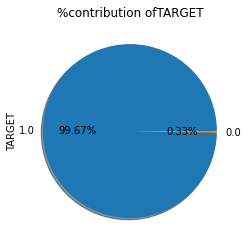

In [ ]:
# count plot
d1_mis["TARGET"].value_counts().plot.pie(autopct="%1.2f%%",shadow=True)
plt.title("%contribution of{0}".format("TARGET"))

# most of the misclassified points are unsatisfied(1) customers.

In [ ]:
d1_mis["TARGET"].value_counts()


1.0    601
0.0      2
Name: TARGET, dtype: int64

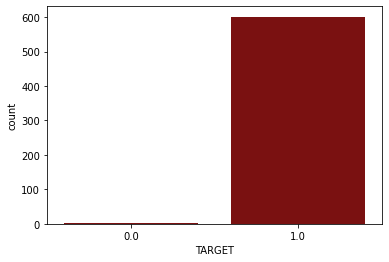

In [ ]:
sns.countplot(data = d1_mis
            ,x = 'TARGET'
            ,color = 'darkred'
            )
plt.show()

<pre>
1. 601 satisfied customers are predicted as the unsatisfied customer
2. unsatisfied(1) customers are classified as the satisified customers(0)
</pre>

# EDA on miss classified dataset points

In [ ]:
def columndistribution_with_target(df,target,col):
  """
    histogramplot:
  """
  plt.figure(figsize=(16,10))
  plt.subplot(1,2,1)
  sns.histplot(x=col,data=df,hue="TARGET")
  plt.xticks(rotation = 0)
  plt.title(col, fontsize = 15, fontweight = 'bold', color = '#bd0b0b')
  plt.xlabel(" ")
  plt.ylabel(" ")
  plt.legend(["1unsatisfied","0satisfied"])
  plt.xticks(fontsize = 12, fontweight = 'bold', color = 'brown')
  plt.yticks(fontsize = 12, fontweight = 'bold', color = 'brown')
  plt.tight_layout()
  """
  boxenplot:
  """
  plt.subplot(1,2,2)
  sns.boxenplot(x = target,y = col,  data = df,palette = 'dark')
  plt.xticks(rotation = 0)
  plt.title(f'{col} vs {target}', fontsize = 20, fontweight = 'bold', color = '#bd0b0b')
  plt.xlabel(" ")
  plt.ylabel(" ")
  plt.legend(["1unsatisfied","0satisfied"])
  plt.xticks(fontsize = 15, fontweight = 'bold', color = 'brown')
  plt.yticks(fontsize = 15, fontweight = 'bold', color = 'brown')
  plt.tight_layout()

  plt.show()


In [ ]:
def bivariate_analysis2(df,target,col1,col2):
  """
     this function takes dataframe and target column & any 2 columns as input.
     gives how those 2 columns are helpful to classification.
  """
  plt.figure(figsize=(5,5))
  sns.scatterplot(x=df[col1],y=df[col2], hue=df[target])
  plt.title("{0}&{1} scatter analysis".format(col1,col2))
  plt.xticks(rotation=0)
  plt.xlabel(" ")
  plt.ylabel(" ")
  plt.xticks(fontsize = 15, fontweight = 'bold', color = 'brown')
  plt.yticks(fontsize = 15, fontweight = 'bold', color = 'brown')
  plt.legend(["1unsatisfied","0satisfied"])
  plt.tight_layout()
  
  #plt.subplot(2,1,2)
  """
   jointplot 
  """
  sns.jointplot(x=df[col1],y=df[col2],hue=df[target])
  plt.title("{0} and {1} distribution".format(col1,col2))
  plt.xticks(rotation=0)
  plt.xlabel(" ")
  plt.ylabel(" ")
  plt.xticks(fontsize = 15, fontweight = 'bold', color = 'brown')
  plt.yticks(fontsize = 15, fontweight = 'bold', color = 'brown')
  plt.legend(["1unsatisfied","0satisfied"])
  plt.tight_layout()
  plt.show()

  """
  heatmap it shows the correlation matrix.
  """
  #plt.subplot(2,2,3)
  plt.figure(figsize=(5,5))
  sns.heatmap(dataframe_train[[col1,col2,target]].corr())
  plt.xticks(rotation=0)
  plt.tight_layout()
  plt.show()

In [ ]:
def columndistribution_with_log_target(df,target,col):
  """
    histogramplot:
  """
  plt.figure(figsize=(16,10))
  plt.subplot(1,2,1)
  sns.histplot(x=np.log(df[col]),data=df,hue="TARGET")
  plt.xticks(rotation = 0)
  plt.title(col, fontsize = 15, fontweight = 'bold', color = '#bd0b0b')
  plt.xlabel(" ")
  plt.ylabel("count")
  plt.legend(["1unsatisfied","0satisfied"])
  plt.xticks(fontsize = 12, fontweight = 'bold', color = 'brown')
  plt.yticks(fontsize = 12, fontweight = 'bold', color = 'brown')
  plt.tight_layout()
  """
  boxenplot:
           Boxenplots (actually called letter-value plots in the original paper )
            show the distribution differently and are better for bigger datasets.
            Classic boxplots can have too many outliers and don't show as much information about the distribution.
  """
  plt.subplot(1,2,2)
  sns.boxenplot(x = target,y = np.log(df[col]),  data = df,palette = 'dark')
  plt.xticks(rotation = 0)
  plt.title(f'{col} vs {target}', fontsize = 20, fontweight = 'bold', color = '#bd0b0b')
  plt.xlabel(" ")
  plt.ylabel(" ")
  plt.legend(["1unsatisfied","0satisfied"])
  plt.xticks(fontsize = 15, fontweight = 'bold', color = 'brown')
  plt.yticks(fontsize = 15, fontweight = 'bold', color = 'brown')
  plt.tight_layout()

  plt.show()

In [ ]:
d1_mis[d1_mis["TARGET"]==1]

var3  var15  imp_ent_var16_ult1  imp_op_var39_comer_ult1  \
44014       2.0   46.0                 0.0                     0.00   
30086       2.0   32.0                 0.0                     0.00   
55145       2.0   43.0                 0.0                     0.00   
24437       2.0   34.0                 0.0                     0.00   
68848       2.0   51.0                 0.0                     0.00   
75837       2.0   30.0                 0.0                     0.00   
31668       2.0   42.0                 0.0                     0.00   
51685       2.0   35.0                 0.0                     0.00   
70443       2.0   56.0                 0.0                     0.00   
52218       2.0   55.0                 0.0                     0.00   
39086       2.0   58.0                 0.0                     0.00   
28206       2.0   33.0               120.0                     0.00   
69568       2.0   63.0                 0.0                     0.00   
66075       2.0   47.0                 0.0                     0.00   
37346       2.0   31.0                 0.0                     0.00   
26327       2.0   31.0                 0.0                     0.00   
46938       2.0   38.0                 0.0                  1865.16   
39335       2.0   53.0                 0.0                     0.00   
68828       2.0   32.0                 0.0                     0.00   
63081       2.0   35.0                 0.0                     0.00   
23084       2.0   23.0                 0.0                     0.00   
46671       2.0   26.0                 0.0                     0.00   
62517       2.0   56.0                 0.0                     0.00   
26788       2.0   25.0                 0.0                     0.00   
21271       2.0   27.0                 0.0                     0.00   
14883       2.0   26.0                 0.0                     0.00   
17648       2.0   27.0                 0.0                   121.80   
32950       2.0   37.0                 0.0                     0.00   
61604       2.0   29.0                 0.0                     0.00   
8327        2.0   32.0                 0.0                     0.00   
58975       2.0   28.0                 0.0                     0.00   
10904       2.0   35.0                 0.0                    14.64   
37378       2.0   28.0                 0.0                     0.00   
59116       2.0   36.0                 0.0                     0.00   
49716       2.0   50.0                 0.0                     0.00   
28673       2.0   58.0                 0.0                   199.50   
66665       2.0   34.0                 0.0                     0.00   
12586       2.0   36.0                 0.0                     0.00   
59339       2.0   46.0                 0.0                     0.00   
29427       2.0   26.0                 0.0                     0.00   
58662       2.0   38.0                 0.0                     0.00   
7304        2.0   36.0                 0.0                     0.00   
640         2.0   23.0                 0.0                     0.00   
1323        2.0   51.0                 0.0                     0.00   
46464       2.0   42.0                 0.0                     0.00   
47565       2.0   47.0                 0.0                     0.00   
54183       2.0   40.0                 0.0                     0.00   
22514       2.0   29.0                 0.0                     0.00   
22777       2.0   32.0                 0.0                  2896.32   
54155       2.0   38.0                 0.0                     0.00   
24073       2.0   42.0                 0.0                     0.00   
74192       2.0   36.0                 0.0                     0.00   
71660       2.0   66.0                 0.0                     0.00   
74438       2.0   44.0                 0.0                     0.00   
41953       2.0   36.0                 0.0                     0.00   
58569       2.0   49.0             

In [ ]:
d1_mis[d1_mis["TARGET"]==0]

var3  var15  imp_ent_var16_ult1  imp_op_var39_comer_ult1  \
19266   2.0   44.0                 0.0                  2180.67   
70937   2.0   40.0               165.0                   133.35   

       imp_op_var39_comer_ult3  imp_op_var40_comer_ult1  \
19266                  2180.67                      0.0   
70937                  1670.61                      0.0   

       imp_op_var40_comer_ult3  imp_op_var40_efect_ult1  \
19266                      0.0                      0.0   
70937                      0.0                      0.0   

       imp_op_var40_efect_ult3  imp_op_var40_ult1  imp_op_var41_comer_ult1  \
19266                      0.0                0.0                  2180.67   
70937                      0.0                0.0                   133.35   

       imp_op_var41_comer_ult3  imp_op_var41_efect_ult1  \
19266                  2180.67                   3150.0   
70937                  1670.61                      0.0   

       imp_op_var41_efect_ult3  imp_op_var41_ult1  imp_op_var39_efect_ult1  \
19266                   3150.0            5330.67                   3150.0   
70937                    630.0             133.35                      0.0   

       imp_op_var39_efect_ult3  imp_op_var39_ult1  imp_sal_var16_ult1  \
19266                   3150.0            5330.67                 0.0   
70937                    630.0             133.35                 0.0   

       ind_var1_0  ind_var5_0  ind_var5  ind_var8_0  ind_var8  ind_var12_0  \
19266         0.0         0.0       0.0         1.0       1.0          0.0   
70937         0.0         0.0       0.0         1.0       1.0          0.0   

       ind_var12  ind_var13_0  ind_var13_corto_0  ind_var13_corto  \
19266        0.0          0.0                0.0              0.0   
70937        0.0          0.0                0.0              0.0   

       ind_var13_largo_0  ind_var13  ind_var14_0  ind_var24_0  ind_var24  \
19266                0.0        0.0          0.0          0.0        0.0   
70937                0.0        0.0          0.0          0.0        0.0   

       ind_var25_cte  ind_var26_0  ind_var26_cte  ind_var25_0  ind_var30  \
19266            1.0          1.0            1.0          1.0        1.0   
70937            0.0          0.0            0.0          0.0        1.0   

       ind_var37_cte  ind_var37_0  ind_var39_0  ind_var40_0  ind_var41_0  \
19266            1.0          1.0          1.0          0.0          1.0   
70937            1.0          1.0          1.0          0.0          1.0   

       num_var1_0  num_var1  num_var4  num_var5_0  num_var5  num_var8_0  \
19266         0.0       0.0       4.0         0.0       0.0         3.0   
70937         0.0       0.0       3.0         0.0       0.0         3.0   

       num_var8  num_var12_0  num_var12  num_var13_0  num_var13_corto_0  \
19266       3.0          0.0        0.0          0.0                0.0   
70937       3.0          0.0        0.0          0.0                0.0   

       num_var13_corto  num_var13_largo_0  num_var13_largo  num_var13  \
19266              0.0                0.0              0.0        0.0   
70937              0.0                0.0              0.0        0.0   

       num_var14_0  num_var14  num_var17_0  num_var17  num_var20_0  num_var20  \
19266          0.0        0.0          0.0        0.0          0.0        0.0   
70937          0.0        0.0          0.0        0.0          0.0        0.0   

       num_var24_0  num_var24  num_var26_0  num_var25_0  num_op_var40_hace2  \
19266          0.0        0.0          3.0          3.0                 0.0   
70937          0.0        0.0          0.0          0.0                 0.0   

       num_op_var40_hace3  num_op_var40_ult1  num_op_var40_ult3  \
19266                 0.0                0.0                0.0   
70937                 0.0                0.0                0.0   

       num_op_var41_hace2  num_op_var41_hace3  num_op_var41_ult1  \
19266                 0.0  

<pre>
1. according to the above dataset most of the dataset having sparse feature(means Zero value)
2. some of the features having the different values but those values are also existed in the kaggle test set also So I didn't remove those values.
3. some of the features having the outliers so that's why some models are not give the good metric  But Xgb is working very well on outliers so it gives good metric compare to the other models.
</pre>

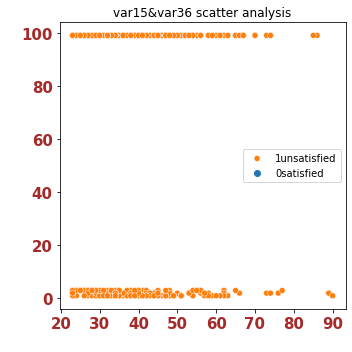

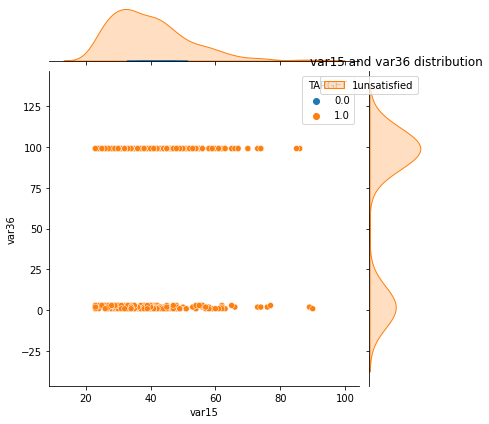

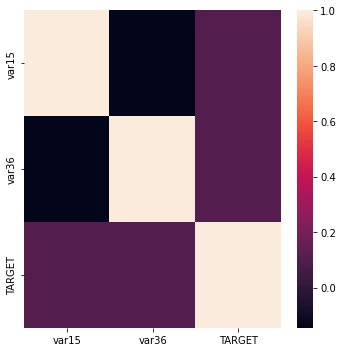

In [ ]:
bivariate_analysis2(d1_mis,"TARGET","var15","var36")

<pre>
Observation:
1.if the var15 value is below than 23 whatever the var36 value it is considered as the satisfied customers.
2.if the var15 value is between the 23-89(approximately) whatever the var36 value it is considered as the unsatisfied customers.
3.these 2 columns having some descent correlation with target and low correlated with each other so these 2 columns are useful for our classification.
4.at the same time those misclassified points also in the same region.
5. this columns is highly correlated with the target but misclassified points having same value but classified as wrongly. 
</pre>

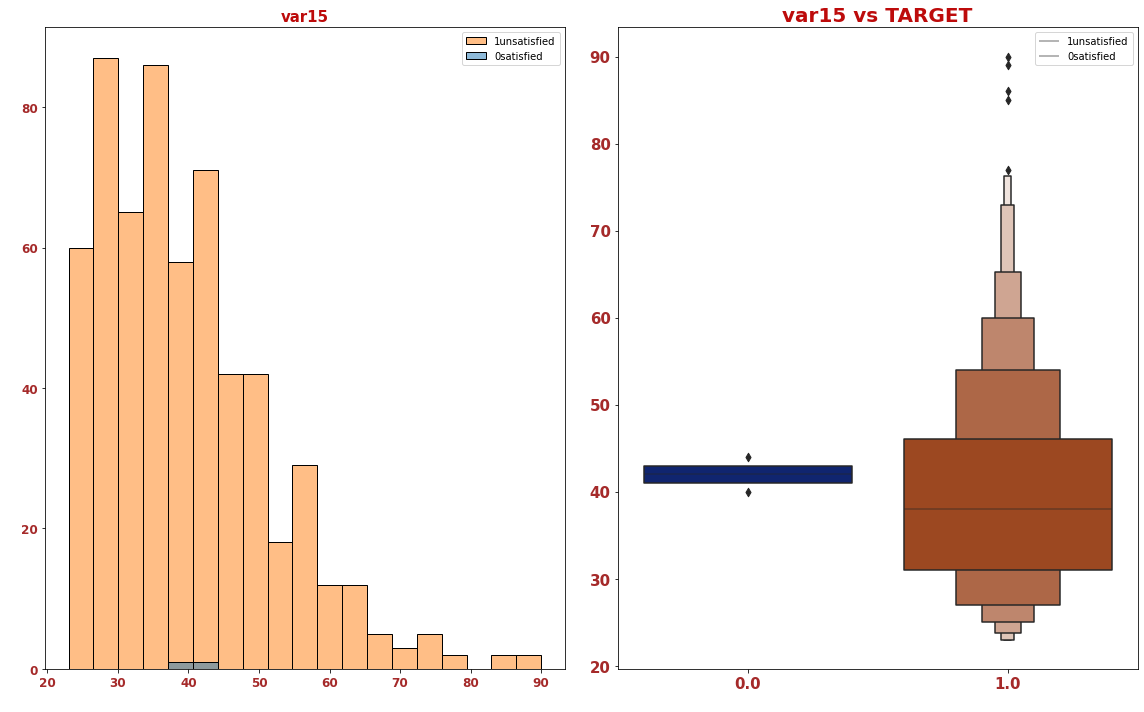

In [ ]:
columndistribution_with_target(d1_mis,"TARGET","var15")

<pre>
1. the misclassified satisfied customer as unsatisfied here most of the unsatisfied customers lie with in the 40-50 so here is the chance to misclassification.
2. most of the points are over lapped with in that region.
</pre>

In [ ]:
d1_mis[["var36","var15"]].value_counts()

var36  var15
99.0   32.0     23
       34.0     20
       40.0     20
       42.0     17
       44.0     16
       30.0     16
       36.0     15
       27.0     14
       45.0     13
       26.0     13
       28.0     13
       23.0     12
       33.0     12
       37.0     12
       31.0     12
       49.0     11
       29.0     11
       38.0     10
3.0    28.0      9
99.0   35.0      9
       47.0      9
       41.0      9
       43.0      8
       58.0      8
       25.0      7
       51.0      7
       46.0      7
       56.0      7
3.0    26.0      7
99.0   24.0      6
1.0    41.0      6
3.0    27.0      6
99.0   52.0      6
1.0    39.0      6
       35.0      6
       34.0      6
       32.0      6
99.0   61.0      5
3.0    30.0      5
99.0   39.0      5
1.0    49.0      5
3.0    40.0      5
99.0   48.0      5
3.0    23.0      4
       35.0      4
1.0    45.0      4
3.0    25.0      4
2.0    45.0      4
1.0    51.0      4
       33.0      4
3.0    29.0      4
99.0   55.0      4

In [ ]:
d1_cor["var36"].value_counts()

99.0    5643
3.0     4366
1.0     2805
2.0     1698
0.0       88
Name: var36, dtype: int64

In [ ]:
d1_mis["var36"].value_counts()

99.0    396
1.0      88
3.0      74
2.0      45
Name: var36, dtype: int64

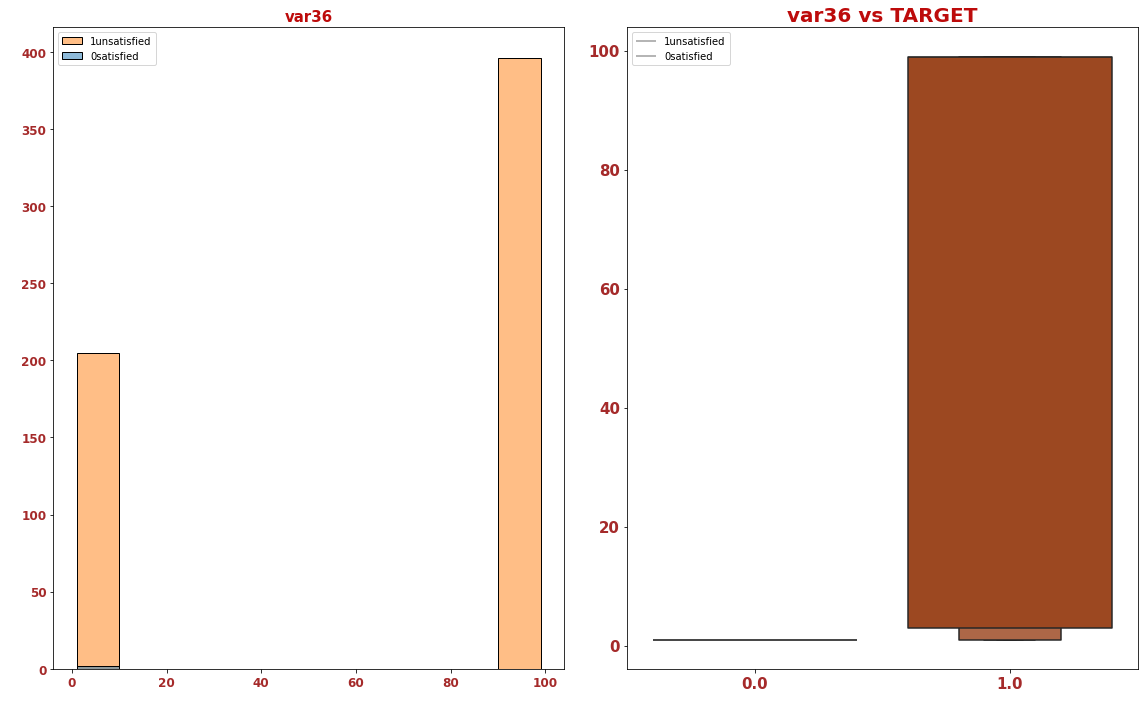

In [ ]:
columndistribution_with_target(d1_mis,"TARGET","var36")

<pre>
1. if var36 value is zero then those are classified as correctly
2. in the remaining values 1,2,3,99 those are having misclassified points
3. but most of the misclassified points having 99 and at the same time most of the correctly classified points also having value 99.0
4. so we can't say exactly
</pre>

In [ ]:
d1_mis["var38"].value_counts()
d1_mis["var38"].nunique()

472

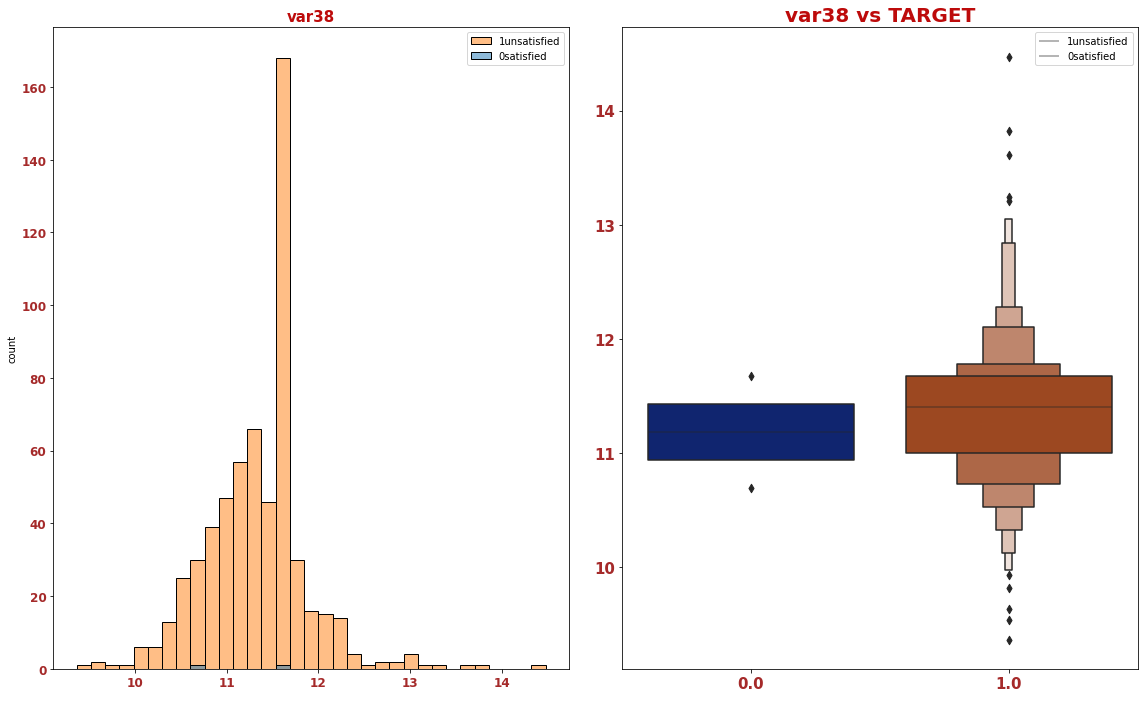

In [ ]:
columndistribution_with_log_target(d1_mis,"TARGET","var38")

<pre>
1. here also got overlapped and classified those ones are wrongly.
</pre>

In [ ]:
d1_mis["num_meses_var5_ult3"].value_counts()

0.0    351
3.0    171
2.0     54
1.0     27
Name: num_meses_var5_ult3, dtype: int64

In [ ]:
d1_cor["num_meses_var5_ult3"].value_counts()

3.0    8328
0.0    3784
2.0    1883
1.0     605
Name: num_meses_var5_ult3, dtype: int64

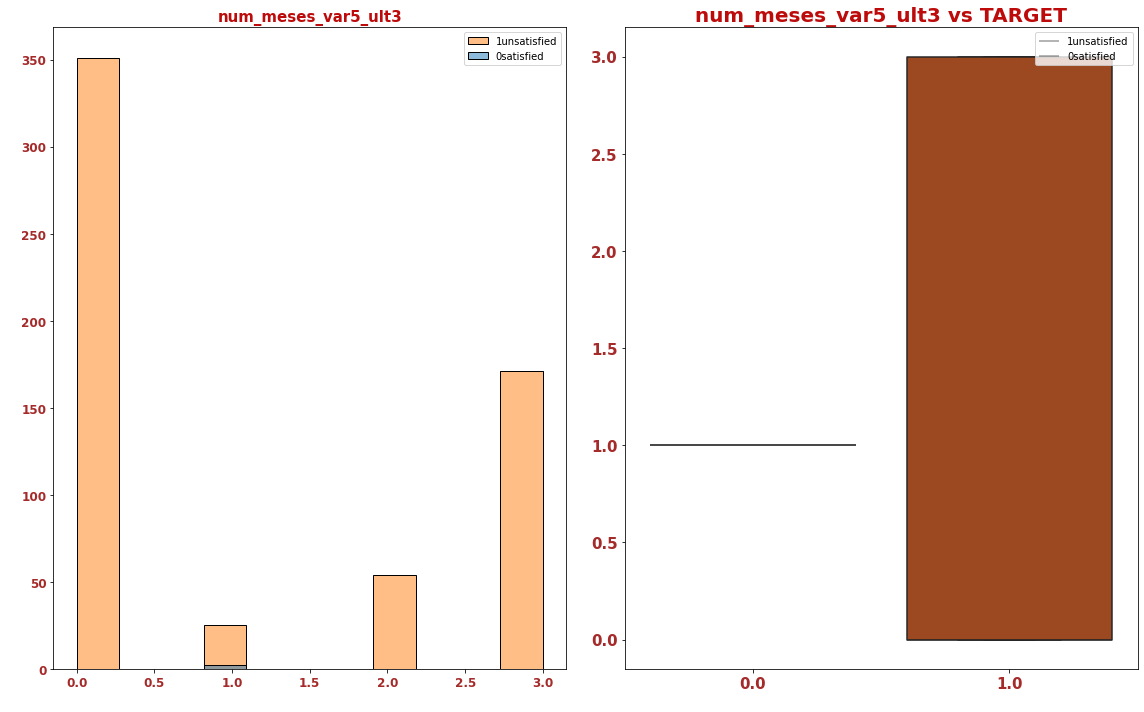

In [ ]:
columndistribution_with_target(d1_mis,"TARGET","num_meses_var5_ult3")

<pre>
1. if num_meses_var5_ult3 most of the correctly classified points and misclassified points  having value zero.
2.less no of points having 1
3. we can't say exactly it is completly overlappped one.


</pre>

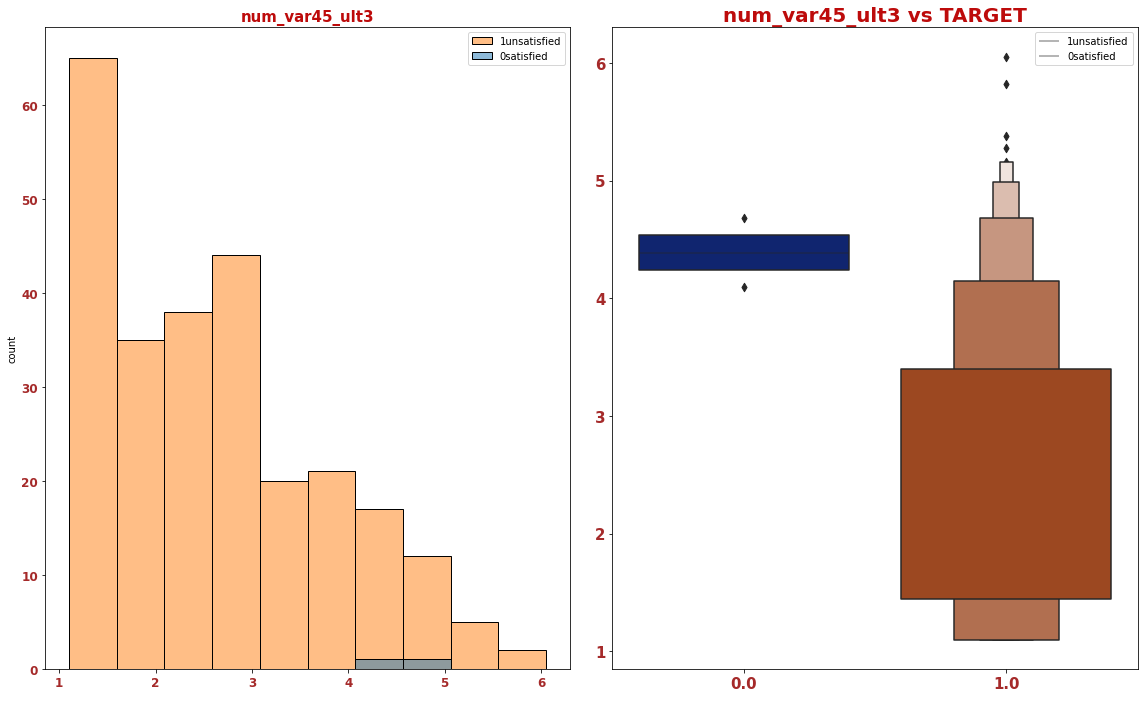

In [ ]:
columndistribution_with_log_target(d1_mis,"TARGET","num_var45_ult3")

In [ ]:
d1_mis["ind_var5"].value_counts()

0.0    380
1.0    223
Name: ind_var5, dtype: int64

In [ ]:
d1_cor["ind_var5"].value_counts()

1.0    9862
0.0    4738
Name: ind_var5, dtype: int64

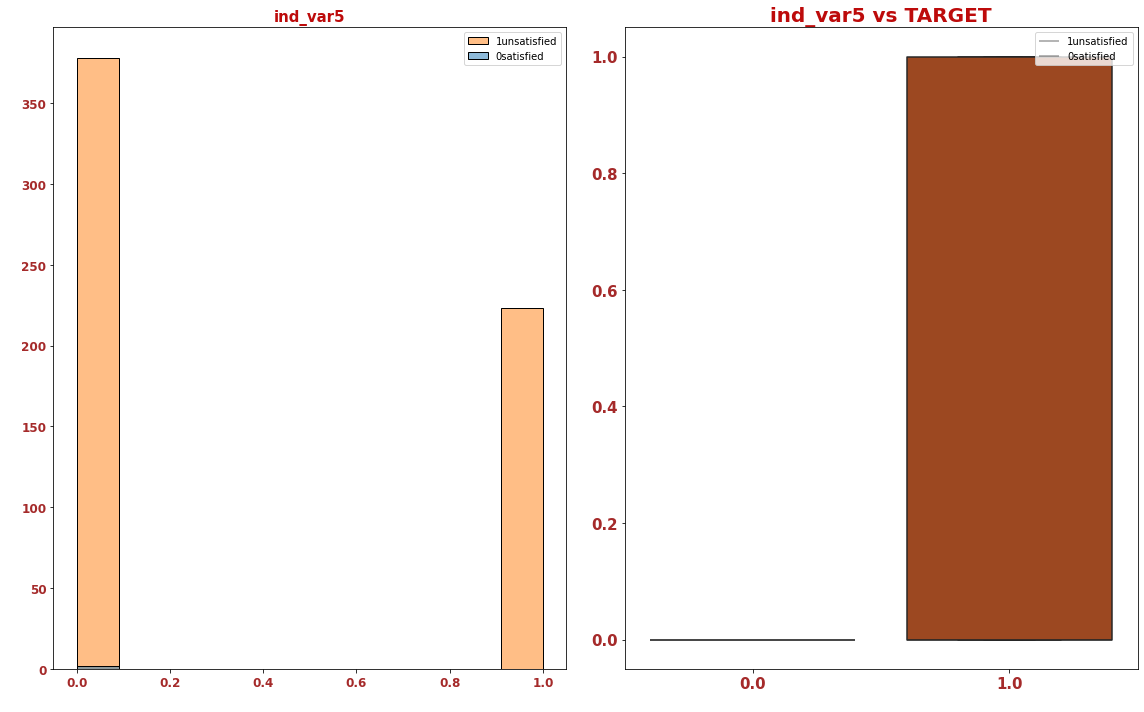

In [ ]:
columndistribution_with_target(d1_mis,"TARGET","ind_var5")

<pre>
1.most of the correctly classified points having the value 1  and most of the misclassified points having the value 0.
2.it is not give any good intution
</pre>

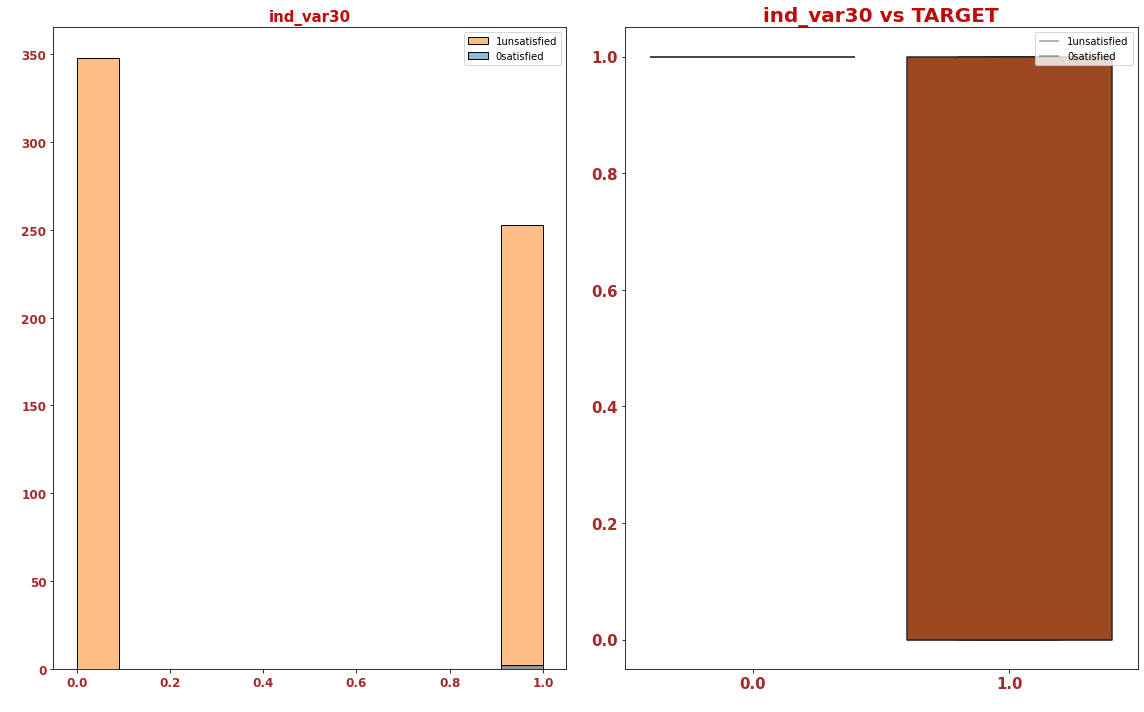

In [ ]:
columndistribution_with_target(d1_mis,"TARGET","ind_var30")

In [ ]:
d1_mis["num_var42"].value_counts()

0.0    352
3.0    248
6.0      2
9.0      1
Name: num_var42, dtype: int64

In [ ]:
d1_cor["num_var42"].value_counts()

3.0     10138
0.0      4056
6.0       397
9.0         8
12.0        1
Name: num_var42, dtype: int64

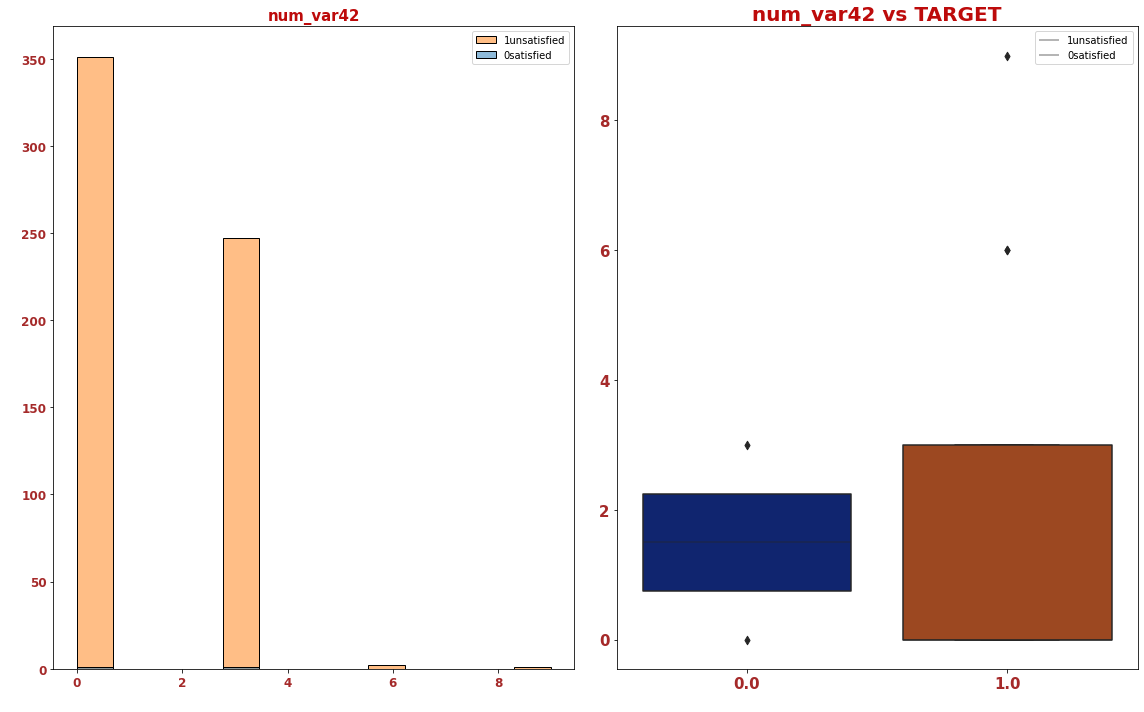

In [ ]:
columndistribution_with_target(d1_mis,"TARGET","num_var42")

<pre>
1.most of the correctly classified and mis classified points are having the value zero.
2.having 9,12 values but those are classified correctly than 0.
</pre>

### observation
<pre>
1. in this dataset most of the mis classified points and classified points having the same value in most of the features.

2. here we have lot of overlapping between satisfied and unsatisfied customers.

3. incase I use smote technique it adds some synthetic points but it increases the correctly classified unsatisfied customers but most of the points are mis classified points.
4. when we try to add new points by using SMOTE it creates some new feature values and those values are not existed in test dataset so no use to improve our metric.

5. in case we are used ADASYN it gives some good metric value but not much variation in the metric value.

ADASYN is generated synthetic points  for harder to learn with in neighbourhoods.
and add some noise to make synthetic data naturally.

6. here most of the datapoints having overlapped values and it is so much hard to interpret satisfied or unsatisfied

7. from my understanding we need some more realistic data for unsatisfied customers and another thing is these all features are annonimized features.

8. suppose these features having the names atleast we perform some type of casuation  then we decide which feature is useful for classification.
</pre>

# roof:

In [ ]:
# 100,4
X = dataframe_train.drop(["ID","TARGET"],axis=1)
Y = dataframe_train["TARGET"]

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,train_size=0.8,stratify=Y,random_state=10)
print("the shape of the train data :",(x_train.shape,y_train.shape))
print("the shape of the test data : ",(x_test.shape,y_test.shape))

#y_predict_tes = clf1.predict(x_test)
d1 = pd.concat([x_test,y_test],axis=1)

the shape of the train data : ((60810, 249), (60810,))
the shape of the test data :  ((15203, 249), (15203,))


In [ ]:
from imblearn.over_sampling import ADASYN
from collections import Counter
counter = Counter(y_train)
print("before sampling : ",counter)
# transform the dataset
oversample = ADASYN()
x_train, y_train = oversample.fit_resample(x_train, y_train)

counter = Counter(y_train)
print("after sampling",counter)

before sampling :  Counter({0.0: 58404, 1.0: 2406})
after sampling Counter({1.0: 58781, 0.0: 58404})


In [ ]:
for i in d1.columns:
  if i not in x_test.columns:
    print(i)

TARGET


In [ ]:
d1 = pd.concat([y_test,x_test],axis=1)
dataset_analysis(d1)

This dataset having 15203 rows and 250 columns.
dataset have 0 integer type & 250 float type & 0 object type
--------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
Int64Index: 15203 entries, 14170 to 41425
Columns: 250 entries, TARGET to var38
dtypes: float64(250)
memory usage: 29.1 MB
None
--------------------------------------------------


TARGET  var3  var15  imp_ent_var16_ult1  imp_op_var39_comer_ult1  \
14170     0.0   2.0   32.0                 0.0                      0.0   
44934     0.0   2.0   23.0                 0.0                      0.0   
34913     0.0   2.0   23.0                 0.0                      0.0   

       imp_op_var39_comer_ult3  imp_op_var40_comer_ult1  \
14170                      0.0                      0.0   
44934                      0.0                      0.0   
34913                      0.0                      0.0   

       imp_op_var40_comer_ult3  imp_op_var40_efect_ult1  \
14170                      0.0                      0.0   
44934                      0.0                      0.0   
34913                      0.0                      0.0   

       imp_op_var40_efect_ult3  imp_op_var40_ult1  imp_op_var41_comer_ult1  \
14170                      0.0                0.0                      0.0   
44934                      0.0                0.0                      0.0   
34913                      0.0                0.0                      0.0   

       imp_op_var41_comer_ult3  imp_op_var41_efect_ult1  \
14170                      0.0                      0.0   
44934                      0.0                      0.0   
34913                      0.0                      0.0   

       imp_op_var41_efect_ult3  imp_op_var41_ult1  imp_op_var39_efect_ult1  \
14170                      0.0                0.0                      0.0   
44934                      0.0                0.0                      0.0   
34913                      0.0                0.0                      0.0   

       imp_op_var39_efect_ult3  imp_op_var39_ult1  imp_sal_var16_ult1  \
14170                      0.0                0.0                 0.0   
44934                      0.0                0.0                 0.0   
34913                      0.0                0.0                 0.0   

       ind_var1_0  ind_var5_0  ind_var5  ind_var8_0  ind_var8  ind_var12_0  \
14170         0.0         1.0       0.0         0.0       0.0          0.0   
44934         0.0         1.0       1.0         0.0       0.0          0.0   
34913         0.0         1.0       1.0         0.0       0.0          0.0   

       ind_var12  ind_var13_0  ind_var13_corto_0  ind_var13_corto  \
14170        0.0          0.0                0.0              0.0   
44934        0.0          0.0                0.0              0.0   
34913        0.0          0.0                0.0              0.0   

       ind_var13_largo_0  ind_var13  ind_var14_0  ind_var24_0  ind_var24  \
14170                0.0        0.0          0.0          0.0        0.0   
44934                0.0        0.0          0.0          0.0        0.0   
34913                0.0        0.0          0.0          0.0        0.0   

       ind_var25_cte  ind_var26_0  ind_var26_cte  ind_var25_0  ind_var30  \
14170            0.0          0.0            0.0          0.0        0.0   
44934            0.0          0.0            0.0          0.0        1.0   
34913            0.0          0.0            0.0          0.0        1.0   

       ind_var37_cte  ind_var37_0  ind_var39_0  ind_var40_0  ind_var41_0  \
14170            0.0          0.0          0.0          0.0          0.0   
44934            0.0          0.0          1.0          0.0          1.0   
34913            0.0          0.0          1.0          0.0          1.0   

       num_var1_0  num_var1  num_var4  num_var5_0  num_var5  num_var8_0  \
14170         0.0       0.0       0.0         3.0       0.0         0.0   
44934         0.0       0.0       1.0         3.0       3.0         0.0   
34913         0.0       0.0       1.0         3.0       3.0         0.0   

       num_var8  num_var12_0  num_var12  num_var13_0  num_var13_corto_0  \
14170       0.0          0.0        0.0          0.0                0.0   
44934       0.0          0.0        0.0          0.0                0.0   
34913       0.0          0.0        0.0      

In [ ]:
#clf1 = XGBClassifier(n_estimators=100,max_depth=4)
clf1 = XGBClassifier(n_estimators=200,max_depth=8)
clf1.fit(x_train,y_train)

XGBClassifier(max_depth=8, n_estimators=200)

In [ ]:
y_predict = clf1.predict_proba(x_test)[:,1]
test_fpr1 , test_tpr1 ,test_thresholds1 = roc_curve(y_test,y_predict)
test_auc = auc(test_fpr1,test_tpr1)
print("test_auc: ",test_auc)

test_auc:  0.8207949394081915


In [ ]:
y_predict_train = clf1.predict_proba(x_train)[:,1]
train_fpr1 , train_tpr1 ,train_thresholds1 = roc_curve(y_train,y_predict_train)
train_auc = auc(train_fpr1,train_tpr1)
print("train_auc: ",train_auc)

train_auc:  0.9961579010800208


In [ ]:
y_predict

array([6.5757513e-01, 8.4751926e-04, 5.2664371e-04, ..., 3.9200997e-01,
       4.6452738e-02, 3.4156211e-02], dtype=float32)

In [ ]:
#y_predict_tes = clf1.predict(x_test)
d1 = pd.concat([x_test,y_test],axis=1)

In [ ]:
dataset_analysis(d1)

This dataset having 15203 rows and 250 columns.
dataset have 0 integer type & 250 float type & 0 object type
--------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
Int64Index: 15203 entries, 14170 to 41425
Columns: 250 entries, var3 to TARGET
dtypes: float64(250)
memory usage: 29.1 MB
None
--------------------------------------------------


var3  var15  imp_ent_var16_ult1  imp_op_var39_comer_ult1  \
14170   2.0   32.0                 0.0                      0.0   
44934   2.0   23.0                 0.0                      0.0   
34913   2.0   23.0                 0.0                      0.0   

       imp_op_var39_comer_ult3  imp_op_var40_comer_ult1  \
14170                      0.0                      0.0   
44934                      0.0                      0.0   
34913                      0.0                      0.0   

       imp_op_var40_comer_ult3  imp_op_var40_efect_ult1  \
14170                      0.0                      0.0   
44934                      0.0                      0.0   
34913                      0.0                      0.0   

       imp_op_var40_efect_ult3  imp_op_var40_ult1  imp_op_var41_comer_ult1  \
14170                      0.0                0.0                      0.0   
44934                      0.0                0.0                      0.0   
34913                      0.0                0.0                      0.0   

       imp_op_var41_comer_ult3  imp_op_var41_efect_ult1  \
14170                      0.0                      0.0   
44934                      0.0                      0.0   
34913                      0.0                      0.0   

       imp_op_var41_efect_ult3  imp_op_var41_ult1  imp_op_var39_efect_ult1  \
14170                      0.0                0.0                      0.0   
44934                      0.0                0.0                      0.0   
34913                      0.0                0.0                      0.0   

       imp_op_var39_efect_ult3  imp_op_var39_ult1  imp_sal_var16_ult1  \
14170                      0.0                0.0                 0.0   
44934                      0.0                0.0                 0.0   
34913                      0.0                0.0                 0.0   

       ind_var1_0  ind_var5_0  ind_var5  ind_var8_0  ind_var8  ind_var12_0  \
14170         0.0         1.0       0.0         0.0       0.0          0.0   
44934         0.0         1.0       1.0         0.0       0.0          0.0   
34913         0.0         1.0       1.0         0.0       0.0          0.0   

       ind_var12  ind_var13_0  ind_var13_corto_0  ind_var13_corto  \
14170        0.0          0.0                0.0              0.0   
44934        0.0          0.0                0.0              0.0   
34913        0.0          0.0                0.0              0.0   

       ind_var13_largo_0  ind_var13  ind_var14_0  ind_var24_0  ind_var24  \
14170                0.0        0.0          0.0          0.0        0.0   
44934                0.0        0.0          0.0          0.0        0.0   
34913                0.0        0.0          0.0          0.0        0.0   

       ind_var25_cte  ind_var26_0  ind_var26_cte  ind_var25_0  ind_var30  \
14170            0.0          0.0            0.0          0.0        0.0   
44934            0.0          0.0            0.0          0.0        1.0   
34913            0.0          0.0            0.0          0.0        1.0   

       ind_var37_cte  ind_var37_0  ind_var39_0  ind_var40_0  ind_var41_0  \
14170            0.0          0.0          0.0          0.0          0.0   
44934            0.0          0.0          1.0          0.0          1.0   
34913            0.0          0.0          1.0          0.0          1.0   

       num_var1_0  num_var1  num_var4  num_var5_0  num_var5  num_var8_0  \
14170         0.0       0.0       0.0         3.0       0.0         0.0   
44934         0.0       0.0       1.0         3.0       3.0         0.0   
34913         0.0       0.0       1.0         3.0       3.0         0.0   

       num_var8  num_var12_0  num_var12  num_var13_0  num_var13_corto_0  \
14170       0.0          0.0        0.0          0.0                0.0   
44934       0.0          0.0        0.0          0.0                0.0   
34913       0.0          0.0        0.0          0.0                0.0   

 

In [ ]:
d1["predict_TARGET"]=clf1.predict(x_test) # add the new column predict_target to the dataset d1

In [ ]:
dataset_analysis(d1)

This dataset having 15203 rows and 251 columns.
dataset have 0 integer type & 251 float type & 0 object type
--------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
Int64Index: 15203 entries, 14170 to 41425
Columns: 251 entries, var3 to predict_TARGET
dtypes: float64(251)
memory usage: 29.2 MB
None
--------------------------------------------------


var3  var15  imp_ent_var16_ult1  imp_op_var39_comer_ult1  \
14170   2.0   32.0                 0.0                      0.0   
44934   2.0   23.0                 0.0                      0.0   
34913   2.0   23.0                 0.0                      0.0   

       imp_op_var39_comer_ult3  imp_op_var40_comer_ult1  \
14170                      0.0                      0.0   
44934                      0.0                      0.0   
34913                      0.0                      0.0   

       imp_op_var40_comer_ult3  imp_op_var40_efect_ult1  \
14170                      0.0                      0.0   
44934                      0.0                      0.0   
34913                      0.0                      0.0   

       imp_op_var40_efect_ult3  imp_op_var40_ult1  imp_op_var41_comer_ult1  \
14170                      0.0                0.0                      0.0   
44934                      0.0                0.0                      0.0   
34913                      0.0                0.0                      0.0   

       imp_op_var41_comer_ult3  imp_op_var41_efect_ult1  \
14170                      0.0                      0.0   
44934                      0.0                      0.0   
34913                      0.0                      0.0   

       imp_op_var41_efect_ult3  imp_op_var41_ult1  imp_op_var39_efect_ult1  \
14170                      0.0                0.0                      0.0   
44934                      0.0                0.0                      0.0   
34913                      0.0                0.0                      0.0   

       imp_op_var39_efect_ult3  imp_op_var39_ult1  imp_sal_var16_ult1  \
14170                      0.0                0.0                 0.0   
44934                      0.0                0.0                 0.0   
34913                      0.0                0.0                 0.0   

       ind_var1_0  ind_var5_0  ind_var5  ind_var8_0  ind_var8  ind_var12_0  \
14170         0.0         1.0       0.0         0.0       0.0          0.0   
44934         0.0         1.0       1.0         0.0       0.0          0.0   
34913         0.0         1.0       1.0         0.0       0.0          0.0   

       ind_var12  ind_var13_0  ind_var13_corto_0  ind_var13_corto  \
14170        0.0          0.0                0.0              0.0   
44934        0.0          0.0                0.0              0.0   
34913        0.0          0.0                0.0              0.0   

       ind_var13_largo_0  ind_var13  ind_var14_0  ind_var24_0  ind_var24  \
14170                0.0        0.0          0.0          0.0        0.0   
44934                0.0        0.0          0.0          0.0        0.0   
34913                0.0        0.0          0.0          0.0        0.0   

       ind_var25_cte  ind_var26_0  ind_var26_cte  ind_var25_0  ind_var30  \
14170            0.0          0.0            0.0          0.0        0.0   
44934            0.0          0.0            0.0          0.0        1.0   
34913            0.0          0.0            0.0          0.0        1.0   

       ind_var37_cte  ind_var37_0  ind_var39_0  ind_var40_0  ind_var41_0  \
14170            0.0          0.0          0.0          0.0          0.0   
44934            0.0          0.0          1.0          0.0          1.0   
34913            0.0          0.0          1.0          0.0          1.0   

       num_var1_0  num_var1  num_var4  num_var5_0  num_var5  num_var8_0  \
14170         0.0       0.0       0.0         3.0       0.0         0.0   
44934         0.0       0.0       1.0         3.0       3.0         0.0   
34913         0.0       0.0       1.0         3.0       3.0         0.0   

       num_var8  num_var12_0  num_var12  num_var13_0  num_var13_corto_0  \
14170       0.0          0.0        0.0          0.0                0.0   
44934       0.0          0.0        0.0          0.0                0.0   
34913       0.0          0.0        0.0          0.0                0.0   

 

In [ ]:
# not equal points
d_mis = d1[d1["TARGET"]!=d1["predict_TARGET"]][["TARGET","predict_TARGET"]]
d_mis.head(3) # unsatisfied customers are classified as satisfied customers.

TARGET  predict_TARGET
14170     0.0             1.0
75187     0.0             1.0
6291      0.0             1.0

In [ ]:
d_cor = d1[d1["TARGET"]==d1["predict_TARGET"]][["TARGET","predict_TARGET"]]
d_cor.head(3)

TARGET  predict_TARGET
44934     0.0             0.0
34913     0.0             0.0
113       0.0             0.0

In [ ]:
d_cor.shape

(14295, 2)

In [ ]:
d_cor[d_cor["predict_TARGET"]==1] # only one unsatisfied customers are predicted correctly.

TARGET  predict_TARGET
68848     1.0             1.0
70443     1.0             1.0
66075     1.0             1.0
26327     1.0             1.0
32950     1.0             1.0
47565     1.0             1.0
22151     1.0             1.0
67834     1.0             1.0
571       1.0             1.0
48419     1.0             1.0
4437      1.0             1.0
62800     1.0             1.0
13395     1.0             1.0
23877     1.0             1.0
15396     1.0             1.0
7008      1.0             1.0
50217     1.0             1.0
6385      1.0             1.0
5793      1.0             1.0
51032     1.0             1.0
8256      1.0             1.0
24342     1.0             1.0
75497     1.0             1.0
54649     1.0             1.0
8286      1.0             1.0
28869     1.0             1.0
12620     1.0             1.0
20254     1.0             1.0
23416     1.0             1.0
49139     1.0             1.0
72574     1.0             1.0
3879      1.0             1.0
69125     1.0             1.0
30214     1.0             1.0
39264     1.0             1.0
58875     1.0             1.0
38260     1.0             1.0
9219      1.0             1.0
28737     1.0             1.0
1771      1.0             1.0
9827      1.0             1.0
42909     1.0             1.0
11937     1.0             1.0
13734     1.0             1.0
17294     1.0             1.0
33515     1.0             1.0
3214      1.0             1.0
59946     1.0             1.0
66057     1.0             1.0
61257     1.0             1.0
45289     1.0             1.0
11693     1.0             1.0
68592     1.0             1.0
22062     1.0             1.0
4306      1.0             1.0
1339      1.0             1.0
73810     1.0             1.0
498       1.0             1.0
13684     1.0             1.0
22386     1.0             1.0
21077     1.0             1.0
5421      1.0             1.0
59148     1.0             1.0
20841     1.0             1.0
59050     1.0             1.0
43849     1.0             1.0
39534     1.0             1.0
5649      1.0             1.0
58220     1.0             1.0
52776     1.0             1.0
45582     1.0             1.0
62783     1.0             1.0
68373     1.0             1.0
73588     1.0             1.0
60811     1.0             1.0
55656     1.0             1.0
30230     1.0             1.0
64681     1.0             1.0
25531     1.0             1.0
69261     1.0             1.0
74378     1.0             1.0
58996     1.0             1.0
23435     1.0             1.0
48659     1.0             1.0
31240     1.0             1.0
732       1.0             1.0
25185     1.0             1.0
14530     1.0             1.0
6520      1.0             1.0
13287     1.0             1.0

In [ ]:
d_mis.shape

(908, 2)

In [ ]:
print("misclassified points :",(len(y_test)-c))

misclassified points : 15203


# d_mis

In [ ]:
d_mis.head()

TARGET  predict_TARGET
14170     0.0             1.0
75187     0.0             1.0
6291      0.0             1.0
44014     1.0             0.0
30086     1.0             0.0

In [ ]:
d_mis["TARGET"].value_counts()

1.0    512
0.0    396
Name: TARGET, dtype: int64

## model debugging

In [ ]:
! pip install eli5
import eli5

     |████████████████████████████████| 106 kB 15.3 MB/s 


In [ ]:
eli5.show_weights(clf1, top=30)
#eli5.explain_prediction_xgboost(model,x_test.iloc[0])

In [ ]:
#eli5.show_weights(model, top=30)
eli5.explain_prediction_xgboost(clf1,x_test.iloc[0])

Explanation(estimator='XGBClassifier(max_depth=4)', description='\nFeatures with largest coefficients.\n\nFeature weights are calculated by following decision paths in trees\nof an ensemble. Each leaf has an output score, and expected scores can also be\nassigned to parent nodes. Contribution of one feature on the decision path\nis how much expected score changes from parent to child. Weights of all \nfeatures sum to the output score of the estimator.\n\nCaveats:\n1. Feature weights just show if the feature contributed positively or\n   negatively to the final score, and does not show how increasing or\n   decreasing the feature value will change the prediction.\n2. In some cases, feature weight can be close to zero for an important feature.\n   For example, in a single tree that computes XOR function, the feature at the\n   top of the tree will have zero weight because expected scores for both\n   branches are equal, so decision at the top feature does not change the\n   expected score. For an ensemble predicting XOR functions it might not be\n   a problem, but it is not reliable if most trees happen to choose the same\n   feature at the top.\n', error=None, method='decision paths', is_regression=False, targets=[TargetExplanation(target=0, feature_weights=FeatureWeights(pos=[FeatureWeight(feature='<BIAS>', weight=3.272033272466053, std=None, value=1.0), FeatureWeight(feature='var38', weight=0.07480874611073754, std=None, value=117310.979016494), FeatureWeight(feature='num_meses_var39_vig_ult3', weight=0.035597864355290255, std=None, value=0.0), FeatureWeight(feature='num_var22_ult3', weight=0.01779474469414355, std=None, value=0.0), FeatureWeight(feature='num_var45_hace3', weight=0.013492601505141241, std=None, value=0.0), FeatureWeight(feature='imp_ent_var16_ult1', weight=0.008723723303842423, std=None, value=0.0), FeatureWeight(feature='ind_var8_0', weight=0.008638357148107192, std=None, value=0.0), FeatureWeight(feature='num_op_var41_ult1', weight=0.007514121363406128, std=None, value=0.0), FeatureWeight(feature='num_var22_ult1', weight=0.004667569470933158, std=None, value=0.0), FeatureWeight(feature='num_var45_ult1', weight=0.0034549678490119265, std=None, value=0.0), FeatureWeight(feature='num_op_var41_hace2', weight=0.0033373811564791555, std=None, value=0.0), FeatureWeight(feature='imp_op_var41_ult1', weight=0.0032646203940258646, std=None, value=0.0), FeatureWeight(feature='saldo_medio_var8_ult3', weight=0.002844268135737621, std=None, value=0.0), FeatureWeight(feature='num_var45_ult3', weight=0.0026728246846378263, std=None, value=0.0), FeatureWeight(feature='saldo_var37', weight=0.0026396597893166627, std=None, value=0.0), FeatureWeight(feature='num_var4', weight=0.0023106554592738702, std=None, value=0.0), FeatureWeight(feature='num_med_var45_ult3', weight=0.0016478128681805954, std=None, value=0.0), FeatureWeight(feature='imp_op_var39_efect_ult3', weight=0.001301263445591057, std=None, value=0.0), FeatureWeight(feature='saldo_var5', weight=0.0009160974960006904, std=None, value=0.0), FeatureWeight(feature='imp_op_var39_efect_ult1', weight=0.0007322555267259816, std=None, value=0.0), FeatureWeight(feature='num_op_var41_ult3', weight=0.000628571128494142, std=None, value=0.0), FeatureWeight(feature='num_var22_hace3', weight=0.0005125130650391356, std=None, value=0.0), FeatureWeight(feature='imp_op_var41_efect_ult1', weight=0.00032706052929554663, std=None, value=0.0), FeatureWeight(feature='saldo_var40', weight=0.00022282566173300667, std=None, value=0.0), FeatureWeight(feature='saldo_var42', weight=0.0001803113822059386, std=None, value=0.0), FeatureWeight(feature='imp_op_var40_efect_ult3', weight=0.00015482914096800343, std=None, value=0.0), FeatureWeight(feature='imp_sal_var16_ult1', weight=0.00011074322009693046, std=None, value=0.0), FeatureWeight(feature='imp_aport_var13_ult1', weight=9.846408476573605e-05, std=None, value=0.0)], neg=[FeatureWeight(feature='var15', weight=-0.6353704181144039, std=None, value=

In [ ]:
# references: https://www.kdnuggets.com/2018/12/machine-learning-explainability-interpretability-ai.html
# refer: https://analyticsindiamag.com/how-to-visualize-and-debug-machine-learning-models-using-eli5/
# refer SHAP: https://medium.com/@kalia_65609/interpreting-an-nlp-model-with-lime-and-shap-834ccfa124e4

# MODEL TRACKER : https://dl.acm.org/doi/epdf/10.1145/2702123.2702509


## kaggle test data

In [ ]:
df_test = pd.read_csv("test.csv")
print("shape of the test dataset:",df_test.shape)
#test_feat = df_test.drop(["ID"],axis=1)
test_feats = df_test[x_train.columns]
test_predicted_vals = clf1.predict_proba(test_feats)[:,1] # we need probability scores.

#
samp_sub =pd.read_csv("sample_submission.csv")

# creating submission file 
submit_base = pd.DataFrame({ "ID": samp_sub.ID, "TARGET": test_predicted_vals})


submit_base.to_csv("Xgb_Classifier_base_err.csv", index=False)

shape of the test dataset: (75818, 370)



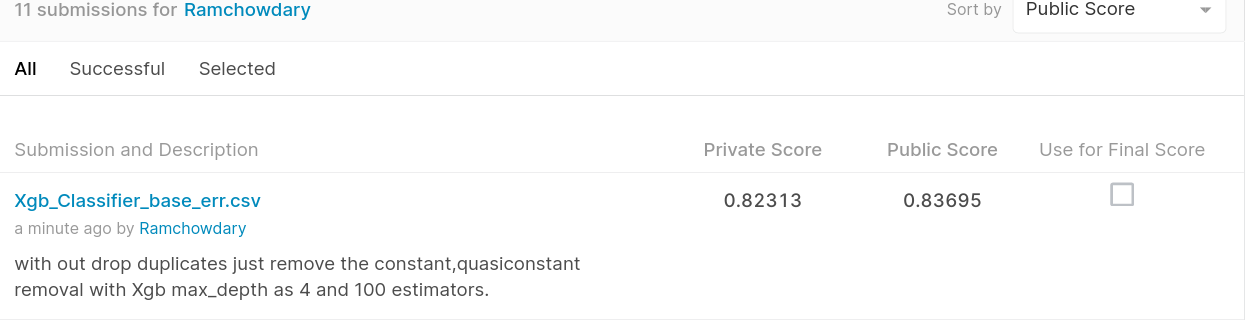


## analysis

In [ ]:
print("ji")

ji
